In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import sys

In [4]:
if 'google.colab' in sys.modules:
        from google.colab import drive
        print("Mounting Google Drive...")
        drive.mount('/content/drive')
image_path = '/content/drive/My Drive/Mario.png'

Mounting Google Drive...
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


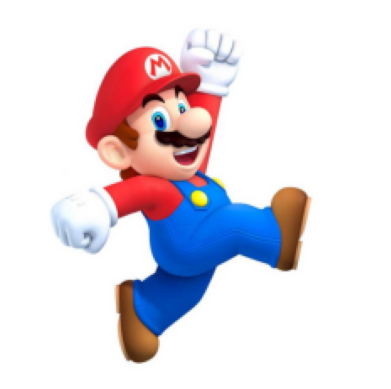

In [5]:
original_img = cv2.imread(image_path)
plt.imshow(cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

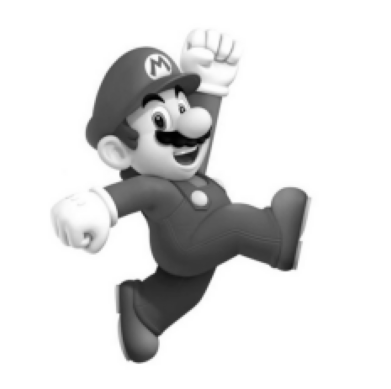

In [6]:
gray_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_img, cmap='gray')
plt.axis('off')
plt.show()

Generated 5x5 Gaussian Kernel:

[[0.00296902 0.01330621 0.02193823 0.01330621 0.00296902]
 [0.01330621 0.0596343  0.09832033 0.0596343  0.01330621]
 [0.02193823 0.09832033 0.16210282 0.09832033 0.02193823]
 [0.01330621 0.0596343  0.09832033 0.0596343  0.01330621]
 [0.00296902 0.01330621 0.02193823 0.01330621 0.00296902]]


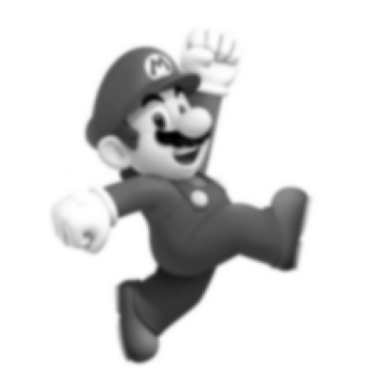

In [8]:

sigma = 1.0
size = 5

r = size // 2
x = np.arange(-r, r + 1)

gauss_1d = np.exp(-(x**2) / (2 * sigma**2))

kernel = np.outer(gauss_1d, gauss_1d)

kernel = kernel / np.sum(kernel)

print("Generated 5x5 Gaussian Kernel:\n")
print(kernel)

smoothed_img = cv2.filter2D(src=gray_img, ddepth=-1, kernel=kernel)
plt.imshow(smoothed_img, cmap='gray')
plt.axis("off")
plt.show()

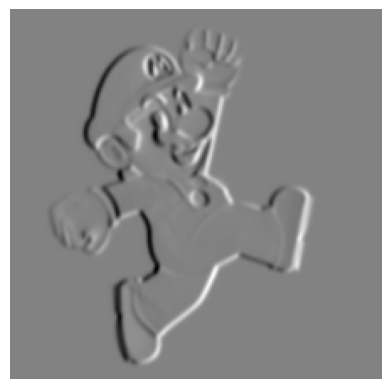

In [10]:
sobel_x_kernel = np.array([[-1, 0, 1],
        [-2, 0, 2],
        [-1, 0, 1]], dtype=np.float32)
grad_x = cv2.filter2D(src=smoothed_img, ddepth=cv2.CV_64F, kernel=sobel_x_kernel)
plt.imshow(grad_x, cmap='gray')
plt.axis("off")
plt.show()

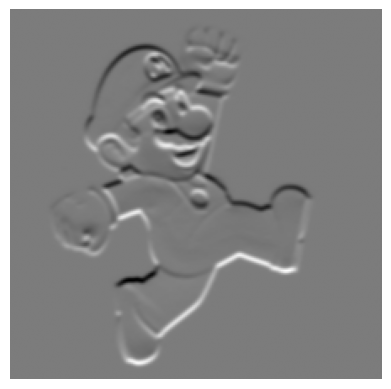

In [11]:
sobel_y_kernel = np.array([[-1, -2, -1],
        [ 0,  0,  0],
        [ 1,  2,  1]], dtype=np.float32)
grad_y = cv2.filter2D(src=smoothed_img, ddepth=cv2.CV_64F, kernel=sobel_y_kernel)
plt.imshow(grad_y, cmap='gray')
plt.axis("off")
plt.show()

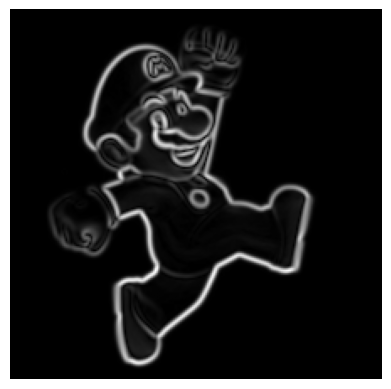

In [14]:
gradient_magnitude = np.sqrt(np.square(grad_x) + np.square(grad_y))
min_val = np.min(gradient_magnitude)
max_val = np.max(gradient_magnitude)

if max_val - min_val == 0:
      normalized_grad = np.zeros_like(gradient_magnitude, dtype=np.uint8)
else:
      normalized_grad = ((gradient_magnitude - min_val) / (max_val - min_val)) * 255.0
      normalized_grad = normalized_grad.astype(np.uint8)
plt.imshow(normalized_grad, cmap='gray')
plt.axis('off')
plt.show()

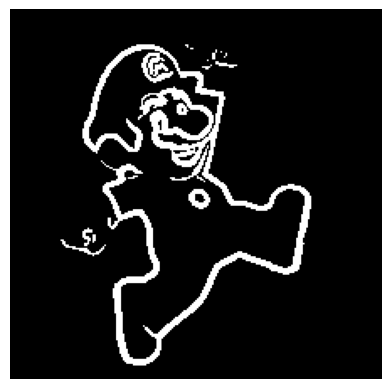

In [15]:
otsu_thresh_val, binary_edge_map = cv2.threshold(
        normalized_grad, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU
    )
plt.imshow(binary_edge_map, cmap='gray')
plt.axis("off")
plt.show()